Sangat disarankan untuk menjalankan notebook ini pada [Google Colab]('https://colab.research.google.com/')

## 1. Import Libraries and Load data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn

In [0]:
mnist = datasets.load_digits()

## 2. Membuat Classification dengan KNN untuk data MNist

In [0]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25)

In [0]:
# kValse = range (start , stop, step)
# pastikan stop - start = bilangan ganjil
kVals = range(1,30,2)
akurasi = []
for k in kVals :
  model =KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)

  #evaluasi
  score = model.score(X_test, y_test)
  print('k={}, akurasi = {}'.format (k,round(score*100, 2)))
  akurasi.append(score)

k=1, akurasi = 98.67
k=3, akurasi = 98.0
k=5, akurasi = 98.22
k=7, akurasi = 98.0
k=9, akurasi = 97.11
k=11, akurasi = 97.11
k=13, akurasi = 98.0
k=15, akurasi = 97.11
k=17, akurasi = 97.11
k=19, akurasi = 96.22
k=21, akurasi = 96.22
k=23, akurasi = 96.22
k=25, akurasi = 96.0
k=27, akurasi = 95.78
k=29, akurasi = 95.78


Dari percobaan diatas, train_test_split menghasilkan akurasi paling tinggi saat k=1 yaitu 98.67 %

### Evaluasi Model dari K yang paling baik

In [0]:
model = KNeighborsClassifier (n_neighbors=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Evaluasinya adalah : ")
print(classification_report(y_test, predictions))

Evaluasinya adalah : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        35
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        50
           7       1.00      1.00      1.00        47
           8       1.00      0.97      0.99        34
           9       0.98      0.94      0.96        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



The following number is [3]


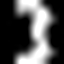

The following number is [9]


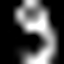

The following number is [6]


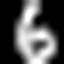

The following number is [6]


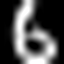

The following number is [1]


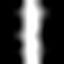

The following number is [9]


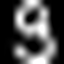

The following number is [7]


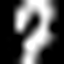

The following number is [3]


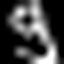

The following number is [0]


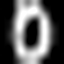

The following number is [4]


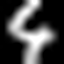

The following number is [1]


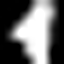

The following number is [7]


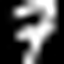

The following number is [7]


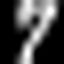

The following number is [5]


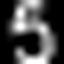

The following number is [0]


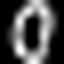

In [0]:
# ambil data dengan jumlah bilangan random sebanyak 15 dari jumlah test label (450). 

from google.colab.patches import cv2_imshow
for i in list (map(int, np.random.randint(0,high=len(y_test), size=(15,)))):
  image = X_test[i]
  pred = model.predict([image])

  image = image.reshape((8,8)).astype("uint8")

  # untuk menampilkan gambar, kita harus rescale dan resize
  # rescale
  image = exposure.rescale_intensity(image, out_range=(0,255))
  # resize dengan imutils tanpa melihat dengan aspek rasio
  # INTER_CUBIC = metode interpolasi
  image = imutils.resize (image, width=64, inter=cv2.INTER_CUBIC)

  print ("The following number is {}".format(pred))
  cv2_imshow(image)